In [194]:
# Calculates posterior from prior and likelihood.

import pandas as pd
import numpy as np

from scipy import stats
from scipy import integrate
from scipy import spatial

from matplotlib import pyplot as plt

(0.0, 0.46833258049013865)

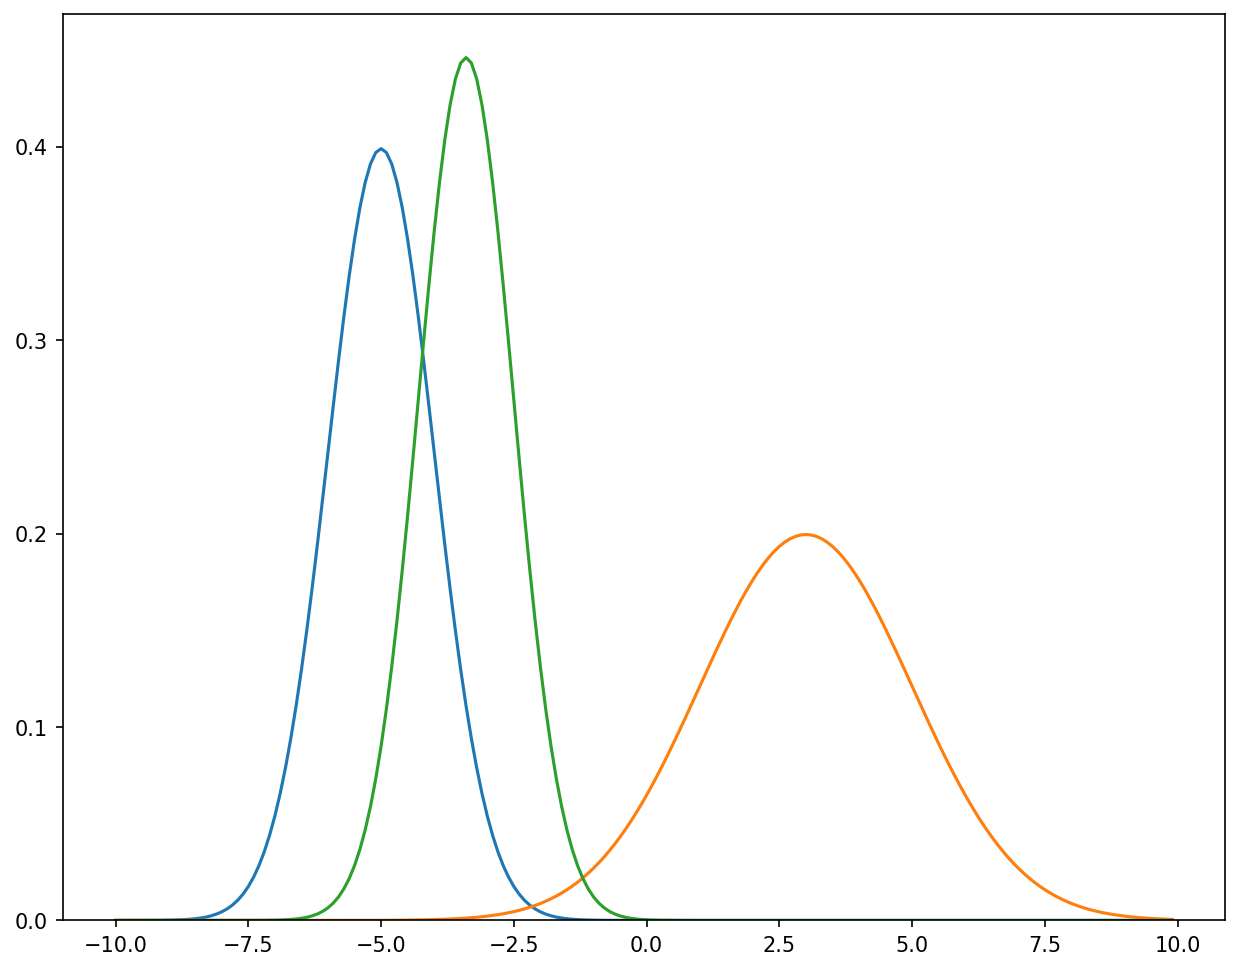

In [195]:
# Example 1, 1D.

x = np.arange(-10, 10, 0.1)

# Prior - Normal.
s_1 = 1
m_1 = -5
y_1 = stats.norm.pdf(x, m_1, s_1)

# Likelihood - Normal.
s_2 = 2
m_2 = 3
y_2 = stats.norm.pdf(x, m_2, s_2)

# Posterior.
y_3 = y_2 * y_1
# Normalize.
y_3 /= integrate.simpson(y_3, x)

# Plot.
fig, ax = plt.subplots()
fig.set_facecolor("w")
fig.set_size_inches(10, 8)
fig.set_dpi(150)

ax.plot(x, y_1)
ax.plot(x, y_2)
ax.plot(x, y_3)
ax.set_ylim(0)

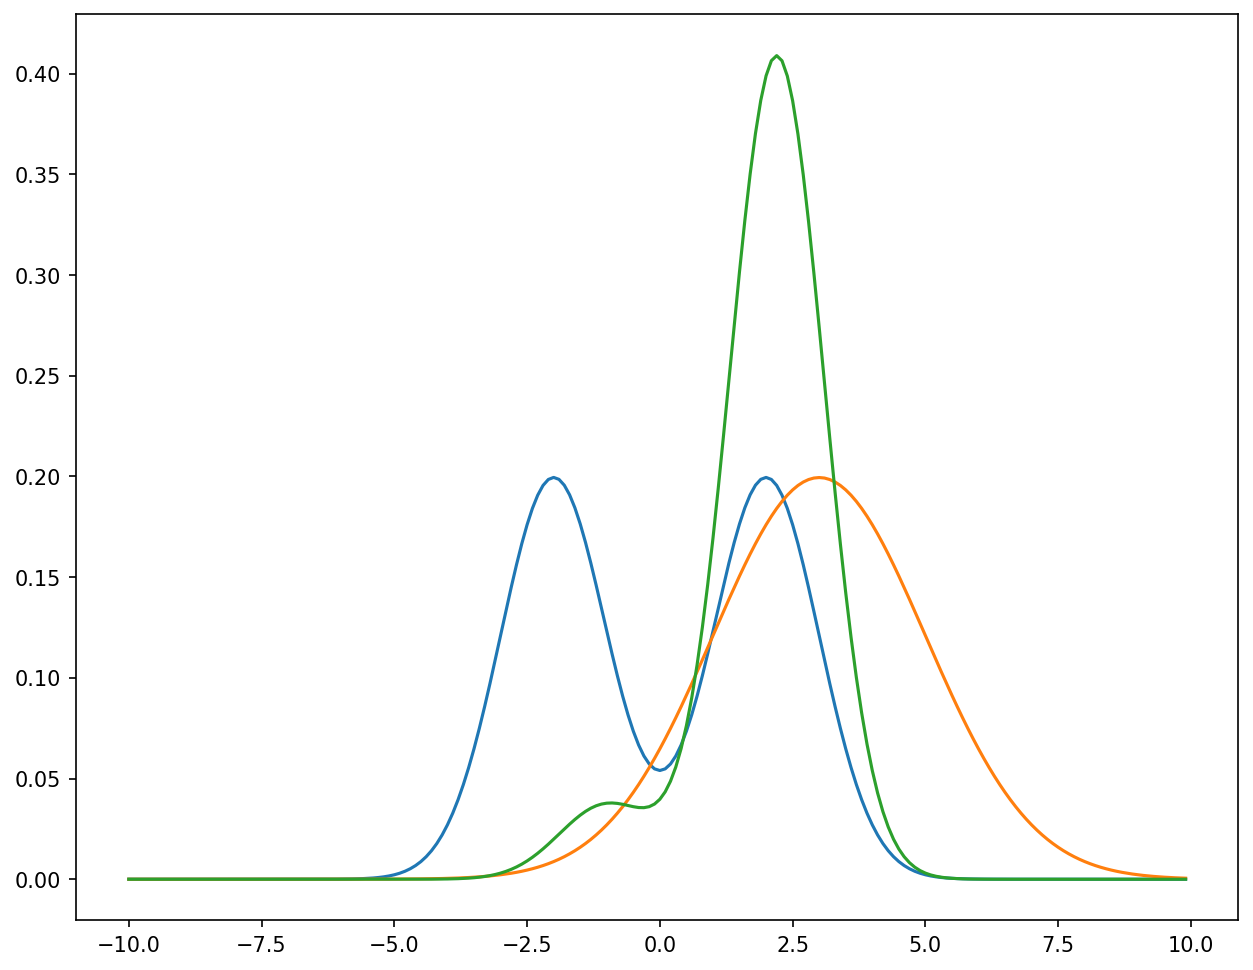

In [196]:
# Example 2, 1D.
x = np.arange(-10, 10, 0.1)

# Prior - Bimodal Normal.
s_1_1 = 1
m_1_1 = -2
s_1_2 = 1
m_1_2 = 2
y_1 = 0.5 * ( stats.norm.pdf(x, m_1_1, s_1_1)
    + stats.norm.pdf(x, m_1_2, s_1_2) )

# Likelihood - Normal.
s_2 = 2
m_2 = 3
y_2 = stats.norm.pdf(x, m_2, s_2)

# Posterior.
y_3 = y_2 * y_1
# Normalize.
y_3 /= integrate.simpson(y_3, x)

# Plot.
fig, ax = plt.subplots()
fig.set_facecolor("w")
fig.set_size_inches(10, 8)
fig.set_dpi(150)

ax.plot(x, y_1)
ax.plot(x, y_2)
ax.plot(x, y_3)

In [197]:
# 2D Simpsons rule.
# Taken from https://stackoverflow.com/questions/8792551/volume-under-plane-
# defined-by-data-points-python

def trapezoidal_area(x, y, z):
    # Stack x, y, z.
    xyz = np.stack([x, y, z], axis = 2)
    # Flatten x, y, dimensions.
    xyz = np.reshape(xyz, [xyz.shape[0] * xyz.shape[1], xyz.shape[2]])
    
    # Obtain Delaunay triangulation of the xy grid.
    d = spatial.Delaunay(xyz[:,:2])
    # A simplex is a N-Dimensional generalization of a triangle.
    # Returns all the triangles, or bases of the prisms fo the Riemann sum.
    tri = xyz[d.simplices]

    # Calculate trapezoidal rule for the volume of the prisms.
    a = tri[:,0,:2] - tri[:,1,:2]
    b = tri[:,0,:2] - tri[:,2,:2]
    vol = np.cross(a, b) @ tri[:,:,2]

    return vol.sum() / 6.0

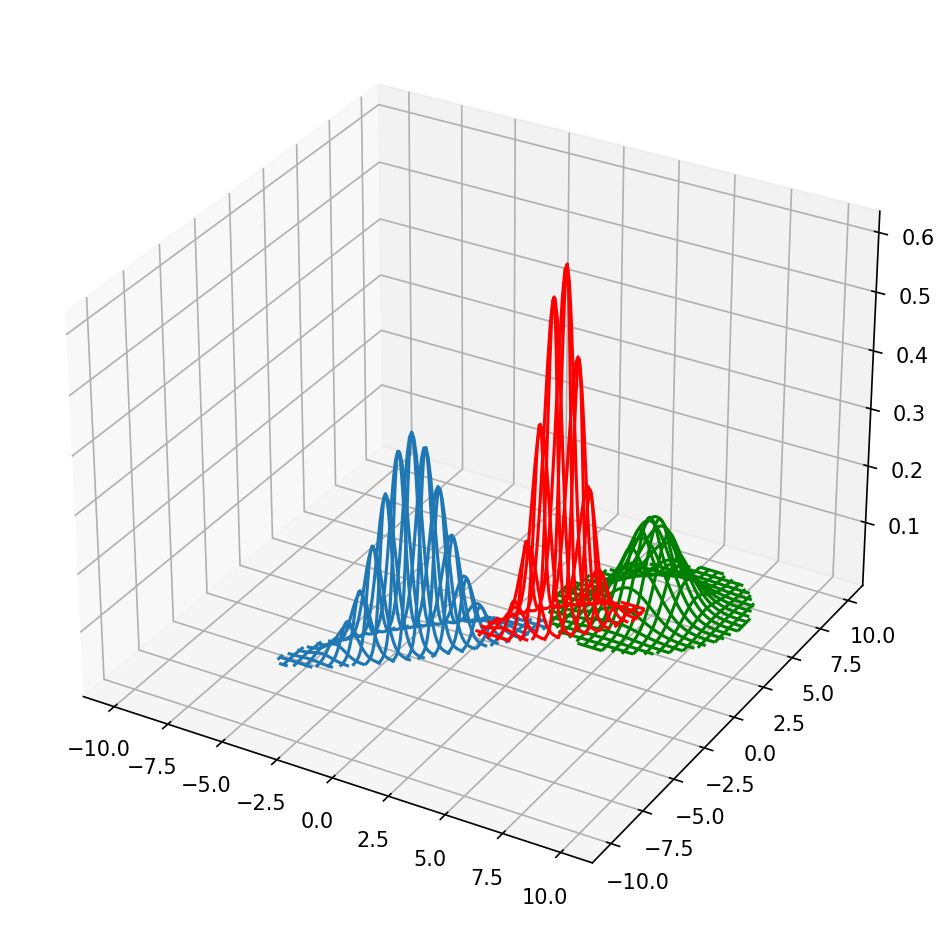

In [198]:
# Example 3, 2D, both wariables observed.

x = np.arange(-10, 10, 0.1)
y = np.arange(-10, 10, 0.1)
mesh = np.meshgrid(x, y)
mesh_s = np.stack(mesh, axis = 2)

# Prior.
# 2D Normal.
mu_x_1 = -2
mu_y_1 = -2
rho_xy_1 = 0.9
cov_1 = np.array( [[1, rho_xy_1], [rho_xy_1, 1]] )
z_1 = stats.multivariate_normal.pdf(
    mesh_s, mean = [mu_x_1, mu_y_1], cov = cov_1)

# Likelihood.
# 2D Normal.
mu_x_2 = 5
mu_y_2 = 5
rho_xy_2 = 0.2
cov_2 = np.array( [[1, rho_xy_2], [rho_xy_2, 1]] )
z_2 = stats.multivariate_normal.pdf(
    mesh_s, mean = [mu_x_2, mu_y_2], cov = cov_2)

# Posterior.
z_3 = z_1 * z_2
# Normalize.
z_3 /= trapezoidal_area(*mesh, z_3)

# Delete very small values to aid in plot visualization.
zz_1 = np.where(z_1 > 0.0001, z_1, np.full_like(z_1, np.nan))
zz_2 = np.where(z_2 > 0.0001, z_2, np.full_like(z_2, np.nan))
zz_3 = np.where(z_3 > 0.0001, z_3, np.full_like(z_3, np.nan))

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
fig.set_facecolor("w")
fig.set_size_inches(10, 8)
fig.set_dpi(150)

ax.plot_wireframe(mesh[0], mesh[1], zz_1)
ax.plot_wireframe(mesh[0], mesh[1], zz_2, color = "green")
ax.plot_wireframe(mesh[0], mesh[1], zz_3, color = "red")

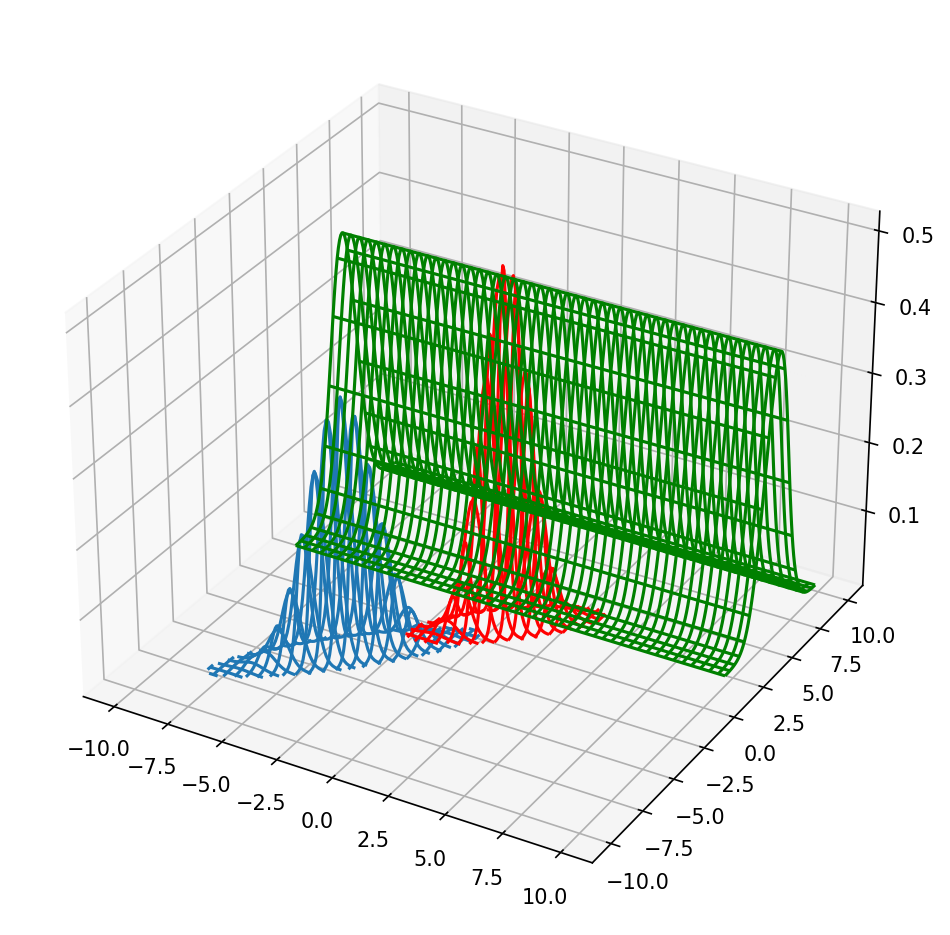

In [199]:
# Example 4, 2D, one wariable observed.

x = np.arange(-10, 10, 0.1)
y = np.arange(-10, 10, 0.1)
mesh = np.meshgrid(x, y)
mesh_s = np.stack(mesh, axis = 2)

# Prior.
# 2D Normal.
mu_x_1 = -4
mu_y_1 = -4
rho_xy_1 = 0.9
cov_1 = np.array( [[1, rho_xy_1], [rho_xy_1, 1]] )
z_1 = stats.multivariate_normal.pdf(
    mesh_s, mean = [mu_x_1, mu_y_1], cov = cov_1)

# Likelihood
# 1D Normal.
s = 1
m = 6
z_2 = stats.norm.pdf(x, m, s)
z_2 = np.tile(np.expand_dims(z_2, 1), 200)

# Posterior
z_3 = z_1 * z_2
# Normalize.
z_3 /= trapezoidal_area(*mesh, z_3)

# Delete very small values to aid in plot visualization.
zz_1 = np.where(z_1 > 0.0001, z_1, np.full_like(z_1, np.nan))
zz_2 = np.where(z_2 > 0.0001, z_2, np.full_like(z_2, np.nan))
zz_3 = np.where(z_3 > 0.0001, z_3, np.full_like(z_3, np.nan))

# Plot.
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
fig.set_facecolor("w")
fig.set_size_inches(10, 8)
fig.set_dpi(150)

ax.plot_wireframe(mesh[0], mesh[1], zz_1)
ax.plot_wireframe(mesh[0], mesh[1], zz_2, color = "green")
ax.plot_wireframe(mesh[0], mesh[1], zz_3, color = "red")